### Section Notes

In this section, we will be testing our baseline models and evaulate their performance on the dataset after feature engineering

### Setting up

In [1]:
!pip install pytorch-tabnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 KB 2.3 MB/s eta 0:00:00


In [6]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

from pytorch_tabnet.tab_model import TabNetClassifier
import torch as torch 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Check Cuda Avaliability
# Shame Apple MacBooks have no Cuda :(
torch.cuda.is_available()

True

In [8]:
### Helper method
# You may consider changeing the colour scheme in practice

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Loading Data

In [9]:
df_train = pd.read_csv('/content/drive/MyDrive/ST4248 Project/dataset/train_normalised.csv')
df_test = pd.read_csv('/content/drive/MyDrive/ST4248 Project/dataset/test_normalised.csv')

In [10]:
X_train = df_train.drop("is_canceled", axis = 1)
y_train = df_train["is_canceled"]

X_test = df_test.drop("is_canceled", axis = 1)
y_test = df_test["is_canceled"]

### Testing TabNet

In [12]:
tabnet = TabNetClassifier()

MAX_EPOCHS = 200
BATCH_SIZE = 1024
VIRTUAL_BATCH_SIZE = 128
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

/usr/local/lib/python3.9/dist-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


In [17]:
clf = TabNetClassifier(seed = 42)

clf.fit(X_train=X_train.values, y_train=y_train.values,
    max_epochs=MAX_EPOCHS , patience=20,
    batch_size=BATCH_SIZE, virtual_batch_size=VIRTUAL_BATCH_SIZE,
    num_workers=0,
    weights=1,
    drop_last=False
)

/usr/local/lib/python3.9/dist-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.9/dist-packages/pytorch_tabnet/abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.53382 |  0:00:04s
epoch 1  | loss: 0.45464 |  0:00:09s
epoch 2  | loss: 0.44431 |  0:00:12s
epoch 3  | loss: 0.43518 |  0:00:15s
epoch 4  | loss: 0.42602 |  0:00:19s
epoch 5  | loss: 0.4307  |  0:00:23s
epoch 6  | loss: 0.4226  |  0:00:27s
epoch 7  | loss: 0.41966 |  0:00:30s
epoch 8  | loss: 0.42295 |  0:00:34s
epoch 9  | loss: 0.41392 |  0:00:38s
epoch 10 | loss: 0.41429 |  0:00:41s
epoch 11 | loss: 0.41341 |  0:00:44s
epoch 12 | loss: 0.41126 |  0:00:49s
epoch 13 | loss: 0.40924 |  0:00:52s
epoch 14 | loss: 0.41758 |  0:00:56s
epoch 15 | loss: 0.40971 |  0:00:59s
epoch 16 | loss: 0.41015 |  0:01:03s
epoch 17 | loss: 0.41233 |  0:01:07s
epoch 18 | loss: 0.40642 |  0:01:10s
epoch 19 | loss: 0.41132 |  0:01:14s
epoch 20 | loss: 0.40956 |  0:01:18s
epoch 21 | loss: 0.40598 |  0:01:21s
epoch 22 | loss: 0.40702 |  0:01:25s
epoch 23 | loss: 0.40538 |  0:01:29s
epoch 24 | loss: 0.40797 |  0:01:33s
epoch 25 | loss: 0.40503 |  0:01:36s
epoch 26 | loss: 0.4043  |  0:01:39s
e

In [18]:
# save tabnet model
saving_path_name = "/content/drive/MyDrive/ST4248 Project/rubbish"
saved_filepath = clf.save_model(saving_path_name)

Successfully saved model at /content/drive/MyDrive/ST4248 Project/rubbish.zip


--------TabNet--------
Correctly classified instances: 28938
Accuracy Score is 0.82386
Recall Score is 0.84126
Precision Score is 0.87127
F1 Score is 0.856
       0      1
0  10549   2717
1   3470  18389
[[10549  2717]
 [ 3470 18389]]


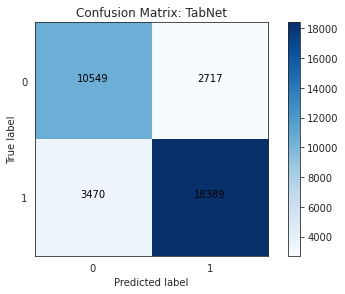

In [22]:
print("--------TabNet--------")


y_predict = clf.predict(X_test.values)
print(f'Correctly classified instances: {sum(y_predict == y_test)}')
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = False, 
                      title='Confusion Matrix: TabNet')